# <font color=#db4d00><center>KNN - KNearest Neighbors</center></font>



K-nearest neighbors is both supervised and unsupervised ML algorithm, that classifies new data based on a similarity measure. The principle is in the name - __K__ stands for the number of nearest neiggbors and __nearest neighbors__ are the nearest known/learned data we already have to the datapoint we are trying to classify. For example it is heavily used in recommendation system, when you are looking into, lets say phones, the recommendations will be for example charges, earphones etc, because the algorithm have data that people who searched for phones mostly search for these related items rather than for fighter jets. That is one of many useful uses.

lets dive into code, it will be more clear to demonstrate on an example, we will try to classify 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
path = ".jupyter\\datasets\\raw\\"
glass_df = pd.read_csv(path + "glass.csv")

In [3]:
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
glass_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
y = glass_df["Type"]
X = glass_df.copy()
X.drop(columns="Type", inplace=True)
X.sample(1)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0


In [7]:
# split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# create, fit and evaluation of the model
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6481481481481481

Our predictions are at around 65%, we can use a loop to play with the parameters to find the most suited settings. There are many parameters you can use, depending on the way you want to classify the data. for example __weights__ (uniform - all weights are equal, distance - closer neighbors have more weight or a user-defined function, __algorithm__ (how to compute nearest neighbors, there are: ball_tree, kd_tree, brute, auto) etc., all those are part of a complex solutions you can use to improve your algorithm and you should be continuously learning them as you progress. 

For our demonstration we will just use the most important param and that is the number of neighbors we want to consider

In [8]:
for neighbors in range(1,11):
    model.n_neighbors=neighbors
    score = model.score(X_test, y_test)*100
    print("score with " + str(neighbors) + " number of neighbors: " + "{:.1f}".format(score) + "%")

score with 1 number of neighbors: 77.8%
score with 2 number of neighbors: 70.4%
score with 3 number of neighbors: 64.8%
score with 4 number of neighbors: 64.8%
score with 5 number of neighbors: 61.1%
score with 6 number of neighbors: 57.4%
score with 7 number of neighbors: 59.3%
score with 8 number of neighbors: 55.6%
score with 9 number of neighbors: 53.7%
score with 10 number of neighbors: 61.1%


#### <font color=#db4d00>How many neighbors is ideal ?</font>

Here we can see, that more neighbors we try to consider, the less accurate our model is. Do not be fooled tho, this is not always (and I would say more often) the case. In most cases __too few neighbors__ can lead to succumbing to outliers and bad accuracy. On the other hand __too many neighbors__ can generalize so much, that some classifications do not have enough datapoints to meet the number of neighbors requirements and the next nearest cluster with enough data will classify it under its own label. 

To demonstrate this, lets load another dataset, which may not be ideal for this algorithm, but will be ideal for demonstration

In [9]:
titanic_df = pd.read_csv(path + "titanic.csv")
titanic_df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [10]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

Ok, we just need to demonstrate the algo, so we will drop most of the columns and leave only which we will propably use<br>

In [11]:
titanic_df = titanic_df[["Passengerid", "Age", "Fare", "2urvived"]]
titanic_df.rename(columns={"2urvived":"Survived"}, inplace=True) # renaming the wrong column name
titanic_df.sample(2)

,Passengerid,Age,Fare,Survived
219,220,30.0,10.500,0
982,983,28.0,7.775,0


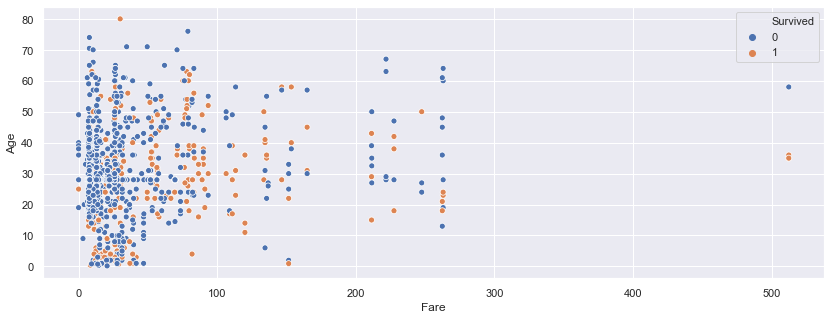

In [12]:
sns.set(rc={"figure.figsize":(14,5)}) # setting the figure size for plotting
sns.scatterplot(data=titanic_df, x="Fare", y="Age", hue="Survived")

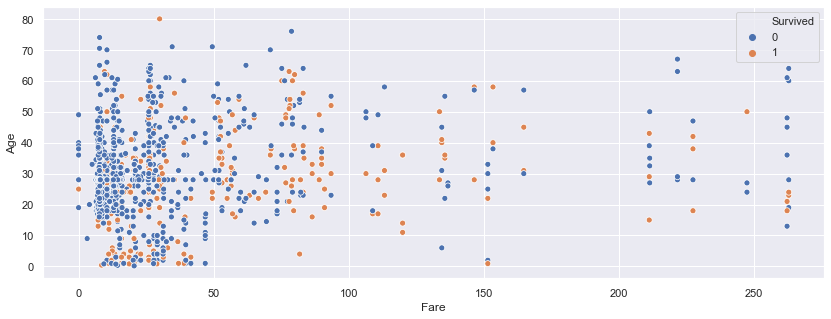

In [13]:
# lets drop the outliers
titanic_df = titanic_df[titanic_df["Fare"]<300]
sns.scatterplot(data=titanic_df, x="Fare", y="Age", hue="Survived")

Ok, we are looking at the Fare and age of passengers and divided them by survival. It is pretty evenly distributed, so the KNN algorithm will strugle with this task, buts lets try it anyway

In [14]:
# split into training and testing data
X = titanic_df[["Fare", "Age"]]
y = titanic_df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# create, fit and evaluation of the model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7217125382262997

Noice, accuracy around 70% is better than I thought, now I will show you on this plot the difference of the number of neighbors you set, lets create a specific passenger, plot him sepparately and try to do 2 predicts with differen n_neighbors and see what happens

In [15]:
# passenger with fare 250 and age of 50
passenger = [[250,50]]

model.n_neighbors=1
print("neighbors set to 1: " + str(model.predict(passenger)))

model.n_neighbors=3
print("neighbors set to 3: " + str(model.predict(passenger)))

neighbors set to 1: [1]
neighbors set to 3: [0]


We can see that adding 2 more neighbors into the equation grants different output (but that may vary if you try to run it few more times - depending if the datapoints around will get into training or testing dataset), to see why lets plot it

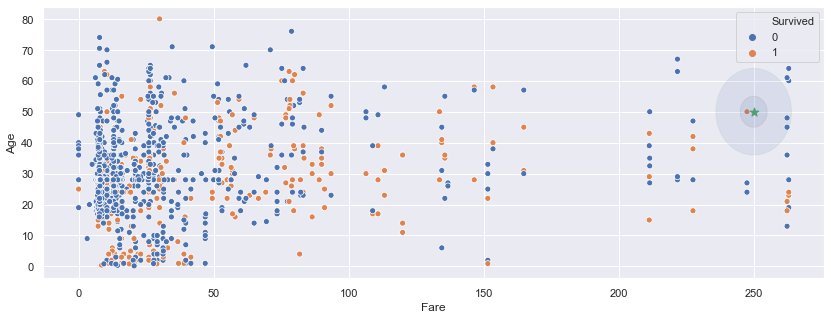

In [16]:
sns.scatterplot(data=titanic_df, x="Fare", y="Age", hue="Survived")
plt.scatter(250, 50, c="g", marker="*", s=80) # plotting our passenger
circle1 = plt.Circle((250,50), 14, alpha=0.1, edgecolor='g') # creating circle
circle2 = plt.Circle((250,50), 5, alpha=0.12, edgecolor='r') # creating circle
plt.gcf().gca().add_artist(circle1) # plotting the circle
plt.gcf().gca().add_artist(circle2) # plotting the circle

Here you can see -fairly- round cirle that shows the difference in outcome when using only 1 neighbor or 3 neighbors. When finding only one nearest neighbor, it first encounter the 1 / "survived" category, when looking for 3 nearest, the outcome is 0 / "did not survive", because it is 2:1 for 0 category

### <font color=#db4d00><center>final words</center></font>
The algorithm under the hood, thanks to the parameters setting, is not that simple and you can tweak it to your needs, but again, the basic idea is still the same here. So, this is the basic concept, dive more into the individual parameters in sklearn documentation and look into each one to know exactly how your model works and try them all out ! Thank you for the time you took, to read through this notebook